**Atualizando a biblioteca para plotagem de gráficos**


In [92]:
!pip -q install plotly --upgrade
!pip -q install yellowbrick

**Importando bibliotecas**

In [93]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import DecisionTreeClassifier

**Abrindo um arquivo CSV do drive**

In [94]:
base = pd.read_csv('restaurantev2.csv', usecols=['Alternativo','Bar','Sex/Sab','Fome','Cliente','Preco','Chuva','Res','Tipo','Tempo','Conclusao'])

In [95]:
base

,Alternativo,Bar,Sex/Sab,Fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim
3,Sim,Nao,Sim,Sim,Cheio,R,Sim,Nao,Tailandes,10-30,Sim
4,Sim,Nao,Sim,Nao,Cheio,RRR,Nao,Sim,Frances,>60,Nao
5,Nao,Sim,Nao,Sim,Alguns,RR,Sim,Sim,Italiano,0-10,Sim
6,Nao,Sim,Nao,Nao,Nenhum,R,Sim,Nao,Hamburger,0-10,Nao
7,Nao,Nao,Nao,Sim,Alguns,RR,Sim,Sim,Tailandes,0-10,Sim
8,Nao,Sim,Sim,Nao,Cheio,R,Sim,Nao,Hamburger,>60,Nao
9,Sim,Sim,Sim,Sim,Cheio,RRR,Nao,Sim,Italiano,10-30,Nao


In [96]:
base.head(3)

,Alternativo,Bar,Sex/Sab,Fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
0,Sim,Nao,Nao,Sim,Alguns,RRR,Nao,Sim,Frances,0-10,Sim
1,Sim,Nao,Nao,Sim,Cheio,R,Nao,Nao,Tailandes,30-60,Nao
2,Nao,Sim,Nao,Nao,Alguns,R,Nao,Nao,Hamburger,0-10,Sim


In [97]:
base.tail(2)

,Alternativo,Bar,Sex/Sab,Fome,Cliente,Preco,Chuva,Res,Tipo,Tempo,Conclusao
10,Nao,Nao,Nao,Nao,Nenhum,R,Nao,Nao,Tailandes,0-10,Nao
11,Sim,Sim,Sim,Sim,Cheio,R,Nao,Nao,Hamburger,30-60,Sim


**Contando quantidade de instâncias**


In [98]:
np.unique(base['Conclusao'], return_counts=True)

(array(['Nao', 'Sim'], dtype=object), array([6, 6], dtype=int64))

<Axes: xlabel='Conclusao', ylabel='count'>

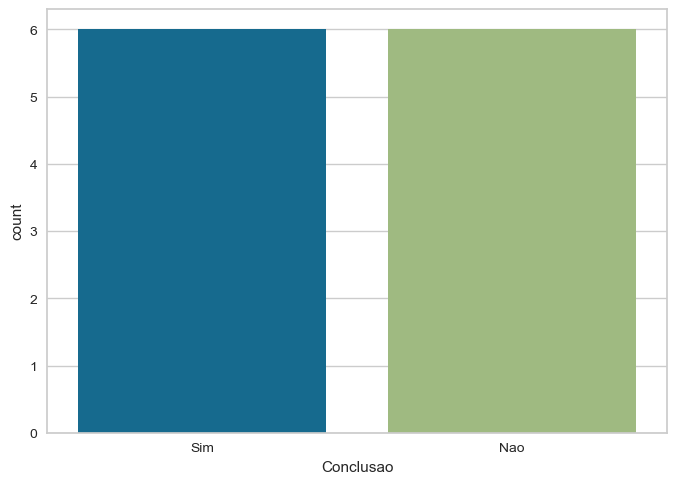

In [99]:
sns.countplot(x = base['Conclusao'])

**Separando os atributos de entrada e de classe**

In [100]:
X_prev = base.iloc[:, 0:10].values

In [101]:
X_prev

array([['Sim', 'Nao', 'Nao', 'Sim', 'Alguns', 'RRR', 'Nao', 'Sim',
        'Frances', '0-10'],
       ['Sim', 'Nao', 'Nao', 'Sim', 'Cheio', 'R', 'Nao', 'Nao',
        'Tailandes', '30-60'],
       ['Nao', 'Sim', 'Nao', 'Nao', 'Alguns', 'R', 'Nao', 'Nao',
        'Hamburger', '0-10'],
       ['Sim', 'Nao', 'Sim', 'Sim', 'Cheio', 'R', 'Sim', 'Nao',
        'Tailandes', '10-30'],
       ['Sim', 'Nao', 'Sim', 'Nao', 'Cheio', 'RRR', 'Nao', 'Sim',
        'Frances', '>60'],
       ['Nao', 'Sim', 'Nao', 'Sim', 'Alguns', 'RR', 'Sim', 'Sim',
        'Italiano', '0-10'],
       ['Nao', 'Sim', 'Nao', 'Nao', 'Nenhum', 'R', 'Sim', 'Nao',
        'Hamburger', '0-10'],
       ['Nao', 'Nao', 'Nao', 'Sim', 'Alguns', 'RR', 'Sim', 'Sim',
        'Tailandes', '0-10'],
       ['Nao', 'Sim', 'Sim', 'Nao', 'Cheio', 'R', 'Sim', 'Nao',
        'Hamburger', '>60'],
       ['Sim', 'Sim', 'Sim', 'Sim', 'Cheio', 'RRR', 'Nao', 'Sim',
        'Italiano', '10-30'],
       ['Nao', 'Nao', 'Nao', 'Nao', 'Nenhum', 'R', '

In [102]:
X_prev[:,5]

array(['RRR', 'R', 'R', 'R', 'RRR', 'RR', 'R', 'RR', 'R', 'RRR', 'R', 'R'],
      dtype=object)

In [103]:
y_classe = base.iloc[:, 10].values

In [104]:
y_classe

array(['Sim', 'Nao', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao',
       'Nao', 'Nao', 'Sim'], dtype=object)

**Tratamento de dados categóricos**

> *LabelEncoder - Vamos tratar os dados categóricos colocando 1, 2, 3 e etc**



In [105]:
from sklearn.preprocessing import LabelEncoder

In [106]:
X_prev[:,5]

array(['RRR', 'R', 'R', 'R', 'RRR', 'RR', 'R', 'RR', 'R', 'RRR', 'R', 'R'],
      dtype=object)

In [107]:
X_prev

array([['Sim', 'Nao', 'Nao', 'Sim', 'Alguns', 'RRR', 'Nao', 'Sim',
        'Frances', '0-10'],
       ['Sim', 'Nao', 'Nao', 'Sim', 'Cheio', 'R', 'Nao', 'Nao',
        'Tailandes', '30-60'],
       ['Nao', 'Sim', 'Nao', 'Nao', 'Alguns', 'R', 'Nao', 'Nao',
        'Hamburger', '0-10'],
       ['Sim', 'Nao', 'Sim', 'Sim', 'Cheio', 'R', 'Sim', 'Nao',
        'Tailandes', '10-30'],
       ['Sim', 'Nao', 'Sim', 'Nao', 'Cheio', 'RRR', 'Nao', 'Sim',
        'Frances', '>60'],
       ['Nao', 'Sim', 'Nao', 'Sim', 'Alguns', 'RR', 'Sim', 'Sim',
        'Italiano', '0-10'],
       ['Nao', 'Sim', 'Nao', 'Nao', 'Nenhum', 'R', 'Sim', 'Nao',
        'Hamburger', '0-10'],
       ['Nao', 'Nao', 'Nao', 'Sim', 'Alguns', 'RR', 'Sim', 'Sim',
        'Tailandes', '0-10'],
       ['Nao', 'Sim', 'Sim', 'Nao', 'Cheio', 'R', 'Sim', 'Nao',
        'Hamburger', '>60'],
       ['Sim', 'Sim', 'Sim', 'Sim', 'Cheio', 'RRR', 'Nao', 'Sim',
        'Italiano', '10-30'],
       ['Nao', 'Nao', 'Nao', 'Nao', 'Nenhum', 'R', '

In [108]:
lb = LabelEncoder()

In [109]:
X_prev[:,0] = lb.fit_transform(X_prev[:,0])
X_prev[:,1] = lb.fit_transform(X_prev[:,1])
X_prev[:,2] = lb.fit_transform(X_prev[:,2])
X_prev[:,3] = lb.fit_transform(X_prev[:,3])
X_prev[:,4] = lb.fit_transform(X_prev[:,4])
X_prev[:,5] = lb.fit_transform(X_prev[:,5])
X_prev[:,6] = lb.fit_transform(X_prev[:,6])
X_prev[:,7] = lb.fit_transform(X_prev[:,7])
X_prev[:,9] = lb.fit_transform(X_prev[:,9])

In [110]:
X_prev

array([[1, 0, 0, 1, 0, 2, 0, 1, 'Frances', 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 'Tailandes', 2],
       [0, 1, 0, 0, 0, 0, 0, 0, 'Hamburger', 0],
       [1, 0, 1, 1, 1, 0, 1, 0, 'Tailandes', 1],
       [1, 0, 1, 0, 1, 2, 0, 1, 'Frances', 3],
       [0, 1, 0, 1, 0, 1, 1, 1, 'Italiano', 0],
       [0, 1, 0, 0, 2, 0, 1, 0, 'Hamburger', 0],
       [0, 0, 0, 1, 0, 1, 1, 1, 'Tailandes', 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 'Hamburger', 3],
       [1, 1, 1, 1, 1, 2, 0, 1, 'Italiano', 1],
       [0, 0, 0, 0, 2, 0, 0, 0, 'Tailandes', 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 'Hamburger', 2]], dtype=object)



> OneHotEncoder - Agora vamos binarizar atributos não ordinais

**Contando quantas opções de resposta tem cada atributo**

In [111]:
len(np.unique(base['Cliente']))

3

In [112]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [113]:
X_prev

array([[1, 0, 0, 1, 0, 2, 0, 1, 'Frances', 0],
       [1, 0, 0, 1, 1, 0, 0, 0, 'Tailandes', 2],
       [0, 1, 0, 0, 0, 0, 0, 0, 'Hamburger', 0],
       [1, 0, 1, 1, 1, 0, 1, 0, 'Tailandes', 1],
       [1, 0, 1, 0, 1, 2, 0, 1, 'Frances', 3],
       [0, 1, 0, 1, 0, 1, 1, 1, 'Italiano', 0],
       [0, 1, 0, 0, 2, 0, 1, 0, 'Hamburger', 0],
       [0, 0, 0, 1, 0, 1, 1, 1, 'Tailandes', 0],
       [0, 1, 1, 0, 1, 0, 1, 0, 'Hamburger', 3],
       [1, 1, 1, 1, 1, 2, 0, 1, 'Italiano', 1],
       [0, 0, 0, 0, 2, 0, 0, 0, 'Tailandes', 0],
       [1, 1, 1, 1, 1, 0, 0, 0, 'Hamburger', 2]], dtype=object)

In [114]:
X_prev[:,0:9]

array([[1, 0, 0, 1, 0, 2, 0, 1, 'Frances'],
       [1, 0, 0, 1, 1, 0, 0, 0, 'Tailandes'],
       [0, 1, 0, 0, 0, 0, 0, 0, 'Hamburger'],
       [1, 0, 1, 1, 1, 0, 1, 0, 'Tailandes'],
       [1, 0, 1, 0, 1, 2, 0, 1, 'Frances'],
       [0, 1, 0, 1, 0, 1, 1, 1, 'Italiano'],
       [0, 1, 0, 0, 2, 0, 1, 0, 'Hamburger'],
       [0, 0, 0, 1, 0, 1, 1, 1, 'Tailandes'],
       [0, 1, 1, 0, 1, 0, 1, 0, 'Hamburger'],
       [1, 1, 1, 1, 1, 2, 0, 1, 'Italiano'],
       [0, 0, 0, 0, 2, 0, 0, 0, 'Tailandes'],
       [1, 1, 1, 1, 1, 0, 0, 0, 'Hamburger']], dtype=object)

In [115]:
onehotencoder_restaurante = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [8])], remainder='passthrough')

In [116]:
X_prev= onehotencoder_restaurante.fit_transform(X_prev)

In [117]:
X_prev

array([[1.0, 0.0, 0.0, 0.0, 1, 0, 0, 1, 0, 2, 0, 1, 0],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 0, 1, 1, 0, 0, 0, 2],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1, 0, 1, 0, 1, 2, 0, 1, 3],
       [0.0, 0.0, 1.0, 0.0, 0, 1, 0, 1, 0, 1, 1, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 2, 0, 1, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 1, 0, 1, 0, 1, 0, 3],
       [0.0, 0.0, 1.0, 0.0, 1, 1, 1, 1, 1, 2, 0, 1, 1],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 1, 1, 1, 1, 1, 0, 0, 0, 2]], dtype=object)

In [118]:
X_prev.shape

(12, 13)

**Método de amostragem Holdout**

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_prev

array([[1.0, 0.0, 0.0, 0.0, 1, 0, 0, 1, 0, 2, 0, 1, 0],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 0, 1, 1, 0, 0, 0, 2],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 1, 0, 1, 1, 1, 0, 1, 0, 1],
       [1.0, 0.0, 0.0, 0.0, 1, 0, 1, 0, 1, 2, 0, 1, 3],
       [0.0, 0.0, 1.0, 0.0, 0, 1, 0, 1, 0, 1, 1, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 0, 0, 2, 0, 1, 0, 0],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 1, 0, 1, 1, 1, 0],
       [0.0, 1.0, 0.0, 0.0, 0, 1, 1, 0, 1, 0, 1, 0, 3],
       [0.0, 0.0, 1.0, 0.0, 1, 1, 1, 1, 1, 2, 0, 1, 1],
       [0.0, 0.0, 0.0, 1.0, 0, 0, 0, 0, 2, 0, 0, 0, 0],
       [0.0, 1.0, 0.0, 0.0, 1, 1, 1, 1, 1, 0, 0, 0, 2]], dtype=object)

In [121]:
y_classe

array(['Sim', 'Nao', 'Sim', 'Sim', 'Nao', 'Sim', 'Nao', 'Sim', 'Nao',
       'Nao', 'Nao', 'Sim'], dtype=object)

In [122]:
y_classe.shape

(12,)

In [123]:
#X_train_ds, X_test_ds, y_train_ds, y_test_ds = train_test_split(X, y, test_size=0.3, random_state=123, shuffle=True, stratify=y)
X_treino, X_teste, y_treino, y_teste = train_test_split(X_prev, y_classe, test_size = 0.20, random_state = 23)

In [124]:
X_treino.shape

(9, 13)

In [125]:
X_teste.shape

(3, 13)

**Vamos experimentar agora o algoritmo Decision Tree?**

In [126]:
modelo = DecisionTreeClassifier(criterion='entropy')
Y = modelo.fit(X_treino, y_treino)

**Vamos testar o modelo?**

In [127]:
previsoes = modelo.predict(X_teste)

**Será se o modelo acertou?**

In [128]:
y_teste

array(['Sim', 'Nao', 'Sim'], dtype=object)

In [129]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
accuracy_score(y_teste,previsoes)

0.3333333333333333

In [130]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix(y_teste, previsoes)

array([[0, 1],
       [1, 1]], dtype=int64)

0.3333333333333333

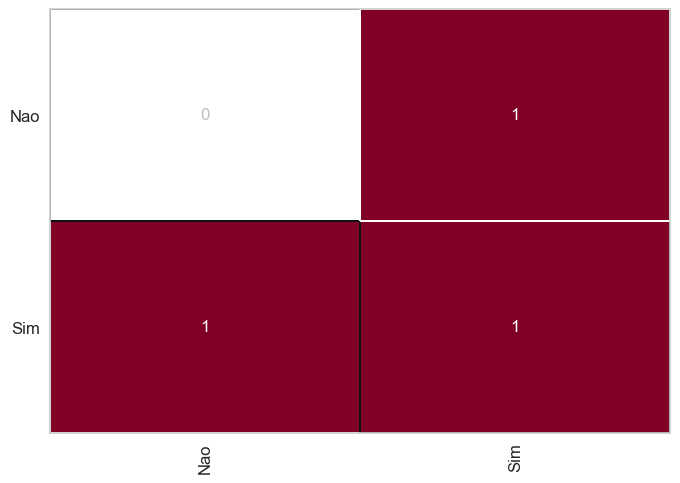

In [131]:
cm = ConfusionMatrix(modelo)
cm.fit(X_treino, y_treino)
cm.score(X_teste, y_teste)

In [132]:
print(classification_report(y_teste, previsoes))

              precision    recall  f1-score   support

         Nao       0.00      0.00      0.00         1
         Sim       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



**Vamos ver a árvore?**

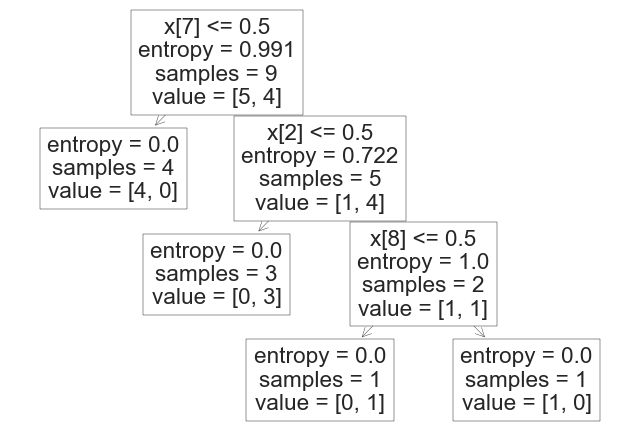

In [133]:
from sklearn import tree
plt.show(tree.plot_tree(Y))

**O que você achou? podemos fazê-la melhor! :-)**

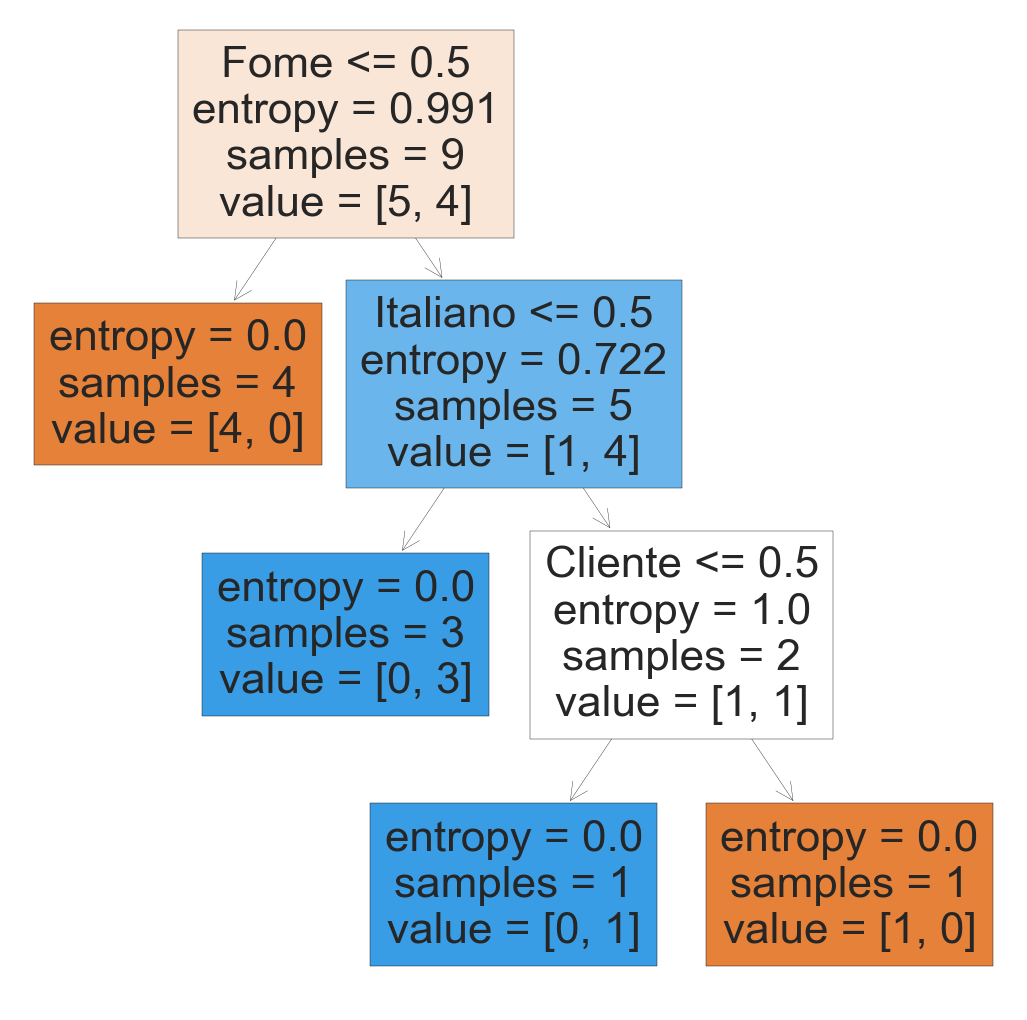

In [134]:
from sklearn import tree
previsores = ['Frances', 'Hamburguer', 'Italiano', 'Tailandes', 'Alternativo', 'Bar', 'SextaSabado', 'Fome', 'Cliente', 'Preco','Chuva','Res', 'Tempo']
figura, eixos = plt.subplots(nrows=1, ncols=1, figsize=(13,13))
tree.plot_tree(modelo, feature_names=previsores, filled=True);